In this notebook, you will embark on a journey through the science of visualizing data. Data visualization is not just about making pretty graphs; it's a crucial part of data analysis that allows us to understand complex data by leveraging the human visual system.

# Why Data Visualization?
In the world of Big Data, with an ever-increasing amount of information to process, the ability to visualize data effectively is invaluable. It helps in:

* **Understanding trends and patterns**: Visual representations can help us spot trends and patterns that are not obvious in raw data.
* **Making informed decisions**: By presenting data in a visual context, we can draw conclusions and make better decisions.
* **Communicating information**: It allows us to convey complex information in a more accessible form, making communication with others more effective.

# Python and Data Visualization
Various libraries make it easy to start, yet powerful enough to create complex visualizations:

* **Matplotlib**: The foundation of many other visualization libraries, it is highly customizable and can create a wide variety of plots.
* **Seaborn**: Built on top of Matplotlib, it simplifies the creation of beautiful and informative statistical graphics.
* **Pandas Plotting**: An extension of the Pandas library, offering quick and easy access to plotting functions for dataframes and series.
* **Plotly**: A library that enables interactive plotting, Plotly can be used to create visually appealing and interactive graphs.

# Note

Both the test and the Jupiter notebook are required parts of this assignment

# Setup
Run the following code cells for the correct execution of the code

In [12]:
!pip install matplotlib seaborn pandas plotly numpy

import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
sns.set_style("whitegrid")

Defaulting to user installation because normal site-packages is not writeable


Upload `LA.csv` to Colab and check if path to the file is correct:

In [9]:
path = '../../Dataset/LA.csv'

original_dataframe = pd.read_csv(path, delimiter = ';', thousands=' ', parse_dates = ['Month'], dayfirst = True)
print(original_dataframe.head())

       Month  America Tropical Interpretive Center  Avila Adobe  \
0 2014-01-01                                6602.0      24778.0   
1 2014-02-01                                5029.0      18976.0   
2 2014-03-01                                8129.0      25231.0   
3 2014-04-01                                2824.0      26989.0   
4 2014-05-01                               10694.0      36883.0   

   Chinese American Museum  Gateway to Nature Center  Firehouse Museum  \
0                   1581.0                       NaN            4486.0   
1                   1785.0                       NaN            4172.0   
2                   3229.0                       NaN            7082.0   
3                   2129.0                       NaN            6756.0   
4                   3676.0                       NaN           10858.0   

   Hellman Quon  IAMLA  Pico House   Visitor Center/ El Tranquilo Gallery  \
0           0.0    NaN       2204.0                                2961.0  

If you see a table with data of attenance to L. A. Musems, then everything is correct!

# Task 1 (15 points)

Before we can create meaningful visualizations, it's important to ensure that our data is in the right format and that we handle any missing or anomalous values appropriately. This step is crucial because visualizations are only as good as the data they represent. Data that hasn't been properly cleaned can lead to misleading conclusions

In this task, you will clean the dataset provided, which includes handling missing values and converting data types. Specifically, you should:

1. Handle missing values by filling them with a value of `0`
2. Convert the visitor number columns from comma-separated strings to `'int64'`

In [13]:
df = original_dataframe

missing_value = 0 # YOUR CODE HERE
df.fillna(missing_value, inplace = True)

for column in df.columns[1 : ]:
    format = int # YOUR CODE HERE
    if df[column].dtype != format:
        df[column] = df[column].astype(int)

print(df.head())
print("\nData types after conversion:")
print(df.dtypes)

       Month  America Tropical Interpretive Center  Avila Adobe  \
0 2014-01-01                                  6602        24778   
1 2014-02-01                                  5029        18976   
2 2014-03-01                                  8129        25231   
3 2014-04-01                                  2824        26989   
4 2014-05-01                                 10694        36883   

   Chinese American Museum  Gateway to Nature Center  Firehouse Museum  \
0                     1581                         0              4486   
1                     1785                         0              4172   
2                     3229                         0              7082   
3                     2129                         0              6756   
4                     3676                         0             10858   

   Hellman Quon  IAMLA  Pico House   Visitor Center/ El Tranquilo Gallery  \
0             0      0         2204                                  2961  

**Question 1**: Why is it important to handle missing values in a dataset before proceeding with data visualization? How might different methods of handling missing data (such as filling with zeros, mean imputation, or dropping rows/columns) affect the outcome of your analysis?

**Anwser:** As far as I am concernec, it is necessary to clean the dataset. The reason is that the unexpected value may influence the data visualization. For instance, the completeness of the data may influence the result of the data visualoization for the reason that the data with undefinred value or missing value might be the invalid value. The invalid value may cause the wrong statistic information. The way of filling the ,missing value is also crucial for the results of data visualization. The advantages and disadvantages are as follows:

1.  **Filling with zeros:** The advantage of this method is that it is easy to fill the missing value with any computation. However, in many disciplines, it is cannot be used to fill the missing values. For example, as for the time series data, we cannot fill the value with zero since it will causes the distortion of the time series data.
2.  **Filling with mean imputation:** It is a very common technique for researchers to fill the missing value with mean imputation. This method can be useful if the data is approximately normally distributed but can reduce the variance in the dataset and potentially bias the estimates if the data is not normally distributed.
3.  **Dropping rows/columns**: This method is also common for us to use. However, it is not useful for us when there are to many samples with missing value in the datasets or there are not enough samples in the datasets. If we drop too much sampls in the dataset, it will also cause the bias of distortion of the data visualization. 

# Task 2 (15 points)
Line plots are a fundamental type of visualization that can display trends over time. In this task, you will create a line plot to visualize the visitor trends for a specific location over the given time period

Create a line plot using Matplotlib to show the visitor numbers for Avila Adobe each month. This will help in understanding how the visitor count has varied over time


1. Set up your plot with appropriate labels for the x-axis (`Month`) and y-axis (`Avila Adobe`)
2. Choose a title and names of axises which accurately describes your plot
3. Plot the `Month` column on the x-axis and the `Avila Adobe` visitor counts on the y-axis

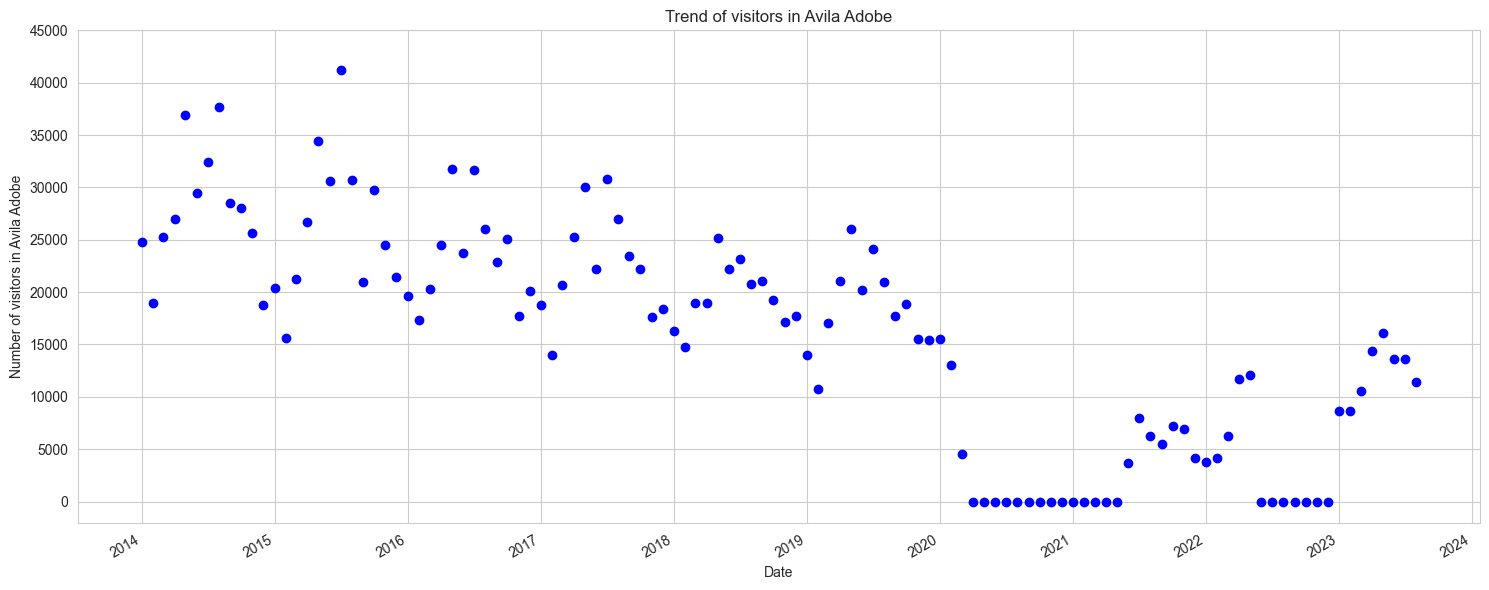

In [21]:
df = original_dataframe

plt.figure(figsize = (15, 6))
x_axis = "Month" # YOUR CODE HERE
y_axis = "Avila Adobe" # YOUR CODE HERE
plt.scatter(df[x_axis], df[y_axis], color = 'blue')

title = "Number of visitors in Avila Adobe per month" # YOUR CODE HERE
name_x_axis = "Date" # YOUR CODE HERE
name_y_axis = "Number of visitors in Avila Adobe" # YOUR CODE HERE
plt.title(title)
plt.xlabel(name_x_axis)
plt.ylabel(name_y_axis)

# Improve the x-axis to show more dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# Determine the maximum y-value rounded up to the nearest 5000
max_y_value = max(df['Avila Adobe'])
rounded_max_y_value = int(-(-max_y_value // 5000) * 5000)

# Set y-axis to show specific tick marks at regular intervals
y_ticks = range(0, rounded_max_y_value + 1, 5000)
plt.yticks(y_ticks)

plt.tight_layout()
plt.show()

**Question 2**: How do visitor numbers change with the seasons, and what could be potential reasons for these fluctuations? Consider how setting specific intervals on the y-axis might aid in identifying these trends

**Anwser:** From the figure, we can find that the visitor arrivals are cyclical over time during the whole year. The peak season of the Avila Adobe is aroung the summer. The number of the visitors in peak season is lower from 2015 before a rising from 2014. There are two contineous month without the visitors in 2020, 2021, and 2023. The reason of that may because of the spread of the COVID-19. 

# Task 3 (15 points)
Now you need to compare visitor trends between two locations over time. This comparative analysis can provide insights into the relative popularity of the locations, as well as the consistency of visitor patterns

Create a line plot using Matplotlib that overlays the visitor numbers for Avila Adobe and Chinese American Museum on the same graph. This will help you compare the trends between these two locations


1. Ensure both columns of visitor numbers are cleaned and in the correct format for plotting
2. Set up your plot with appropriate labels for the x-axis and y-axis
3. Plot both Avila Adobe and Chinese American Museum visitor counts on the y-axis with the `Month` on the x-axis
4. Add a legend to distinguish between the two locations
5. Customize the appearance of your plot, such as line colors and styles, to make the trends clear and distinct

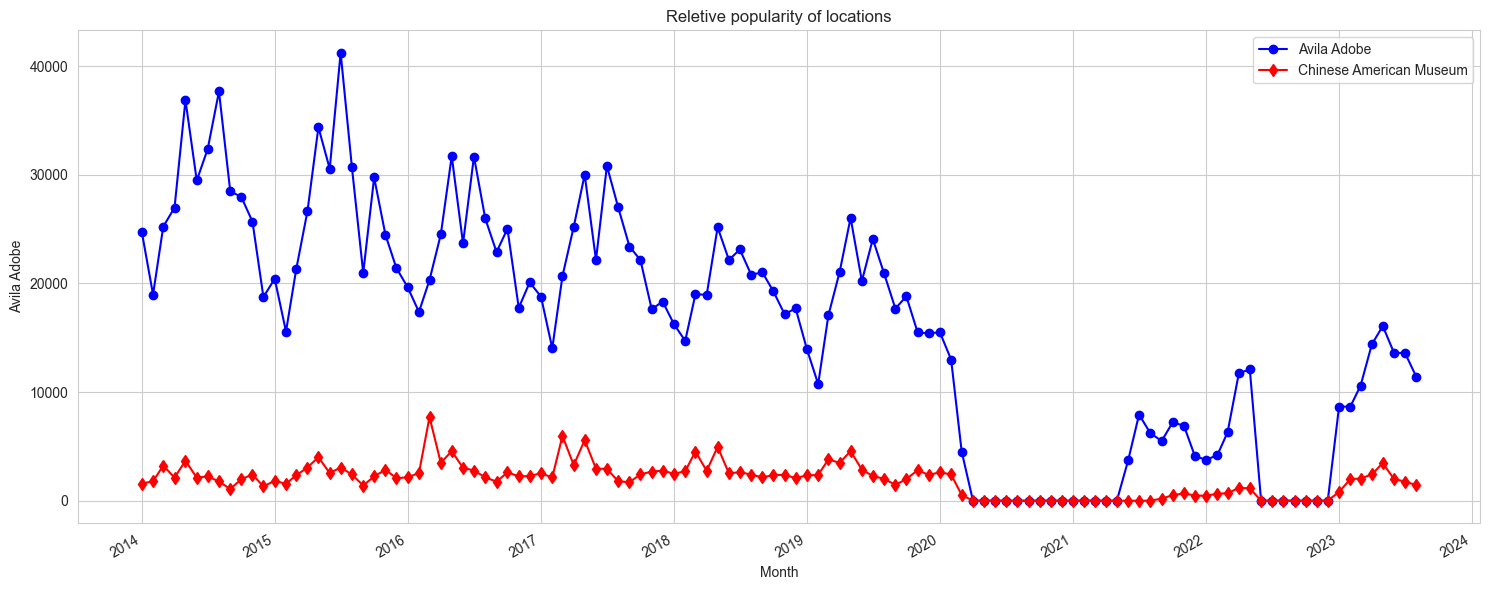

In [44]:
df = original_dataframe
df_sorted = df.sort_values('Month')

plt.figure(figsize = (15, 6))

plt.plot(df_sorted['Month'], df_sorted['Avila Adobe'], label = 'Avila Adobe', color = 'blue', marker = 'o')
plt.plot(df_sorted['Month'], df_sorted['Chinese American Museum'], label = 'Chinese American Museum', color = 'red', marker = 'd') # YOUR CODE HERE ABOUT THE Chinese American Museum. Choose another color and marker for this line

# Adding title and labels
plt.title("Reletive popularity of locations")# YOUR CODE HERE
plt.xlabel("Month") # YOUR CODE HERE
plt.ylabel("Avila Adobe")# YOUR CODE HERE

# Setting x-axis major and minor locators and formatters
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# Adding a legend to distinguish between the two lines
plt.legend()

plt.tight_layout()
plt.show()

**Question 3**: What similarities and differences do you observe in the visitor patterns over time? Discuss possible reasons for these trends and how they might inform future decisions for museum management and marketing strategies

**Answer:** The similarity between two museums is that both of them have the same period during 2020, 2021, and 2022. I suppose that it may because of the break out of the COVIND-19. The difference is that the number of visitors in Chinese American Museum is lower than that of the Avila Adobe during these years. The reason may be that the reputation of the Chinese American Museum is not as high as Avila Adobe or there is the geography location problem for the Chinese American Museum. As for the Avila Adobe, I suppose that they need to propose more discount for the tourist so that more people are willing to visit there. As for the Chinese American Museum, they need more advocacy to let more people know about htem.

# Task 4 (15 points)
 Data visualization is not just about creating graphs; it's also about interpreting data, understanding the story it tells, and making informed decisions based on that data

Heatmaps are effective for displaying the magnitude of a phenomenon as color in two dimensions and can reveal any patterns or correlations in the data.

1. Convert the 'Month' column to a format that extracts the year and month separately for grouping.
2. Filter data to display only 2014 year
3. Use Seaborn's heatmap function to visualize the pivot table, displaying how visitor numbers change over months and across locations.

In [36]:
# Just for Debug
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

file_path = '../../Dataset/LA.csv'
attendance_data = pd.read_csv(file_path, delimiter=';')
attendance_data["Month"].head

attendance_data['Month'] = pd.to_datetime(attendance_data['Month'], dayfirst = True)
attendance_data.head


<bound method NDFrame.head of          Month America Tropical Interpretive Center Avila Adobe  \
0   2014-01-01                                6 602      24 778   
1   2014-02-01                                5 029      18 976   
2   2014-03-01                                8 129      25 231   
3   2014-04-01                                2 824      26 989   
4   2014-05-01                               10 694      36 883   
..         ...                                  ...         ...   
111 2023-04-01                                3 389      14 393   
112 2023-05-01                                3 816      16 085   
113 2023-06-01                                2 227      13 604   
114 2023-07-01                                2 057      13 607   
115 2023-08-01                                1 470      11 413   

    Chinese American Museum Gateway to Nature Center Firehouse Museum  \
0                     1 581                      NaN            4 486   
1                  

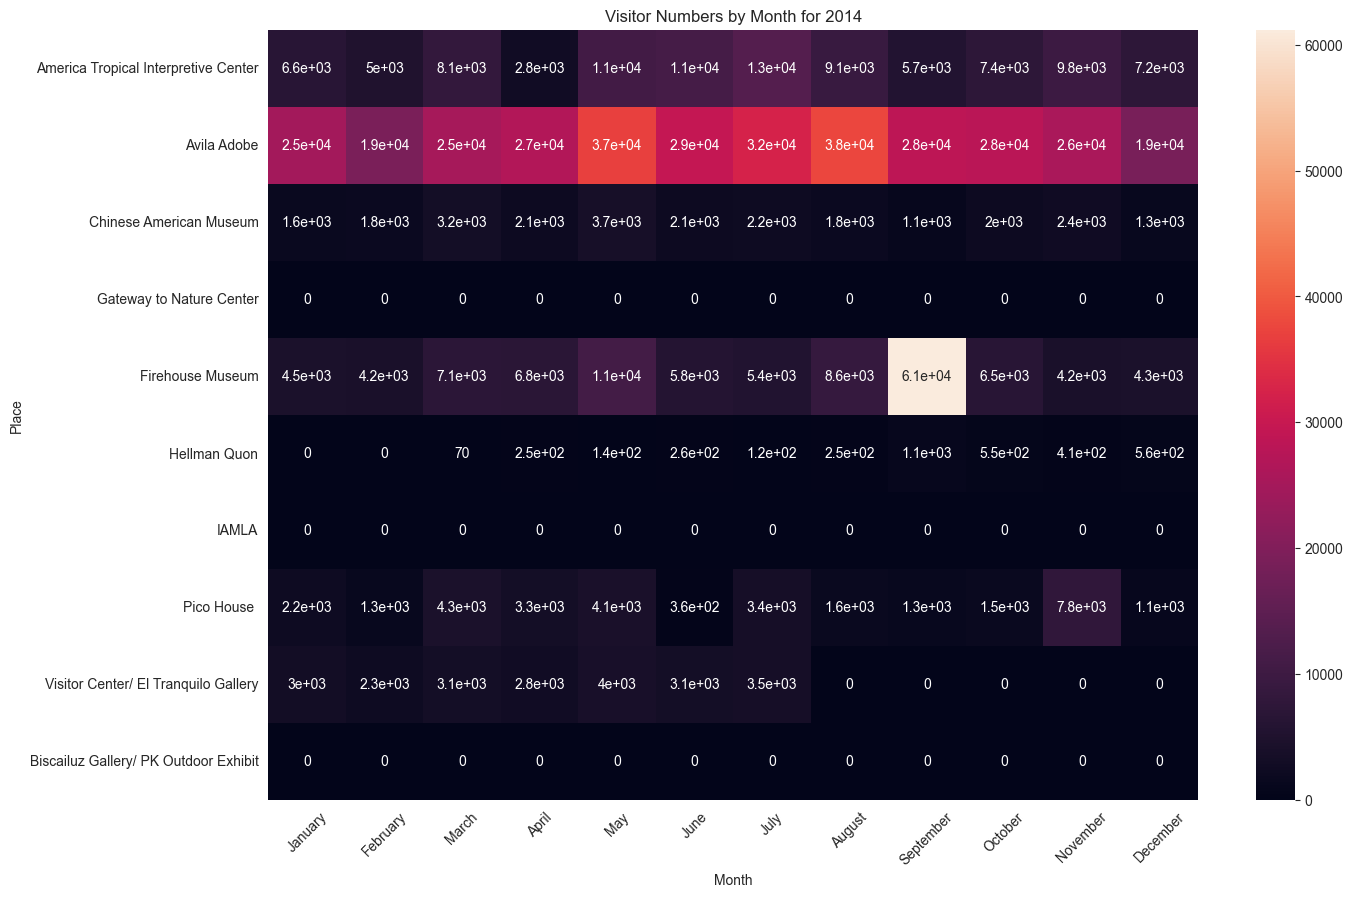

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Load the data from the uploaded file
file_path = '../../Dataset/LA.csv'
attendance_data = pd.read_csv(file_path, delimiter=';')

# Convert 'Month' to datetime and format it for easy sorting
attendance_data['Month'] = pd.to_datetime(attendance_data['Month'], dayfirst = True)# YOUR CODE HERE


# Replace spaces in visitor numbers and convert to integer
for column in attendance_data.columns[1:]:
    attendance_data[column] = attendance_data[column].str.replace(' ', '').astype(float)

# Fill missing values with 0 (assuming no visitors for missing data)
attendance_data.fillna(0, inplace=True)


# Set the index of the dataframe to the 'Month' column for easier plotting
attendance_data.set_index('Month', inplace=True)

# Extract only the year 2014
attendance_data_2014 = attendance_data[attendance_data.index.year == 2014]# YOUR CODE HERE

# Replace month numbers with month names for better readability
attendance_data_2014.index = attendance_data_2014.index.strftime('%B')

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(attendance_data_2014.T, annot=True)# YOUR CODE HERE

plt.title("Visitor Numbers by Month for 2014")
plt.xlabel("Month")
plt.ylabel("Place")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()



# Bonus task 1 (bonus 15 points)

Use **Excel** to create lineplot from task 3

Create a line plot using Excel that overlays the visitor numbers over time for Avila Adobe and Chinese American Museum on the same graph.

Create
Ensure both columns of visitor numbers are cleaned and in the correct format for plotting
Set up your plot with appropriate labels for the x-axis and y-axis
Plot both Avila Adobe and Chinese American Museum visitor counts on the y-axis with the Month on the x-axis

Attach screenshot of the plot from Excel



<img src="Reletive popularity of locations.png">

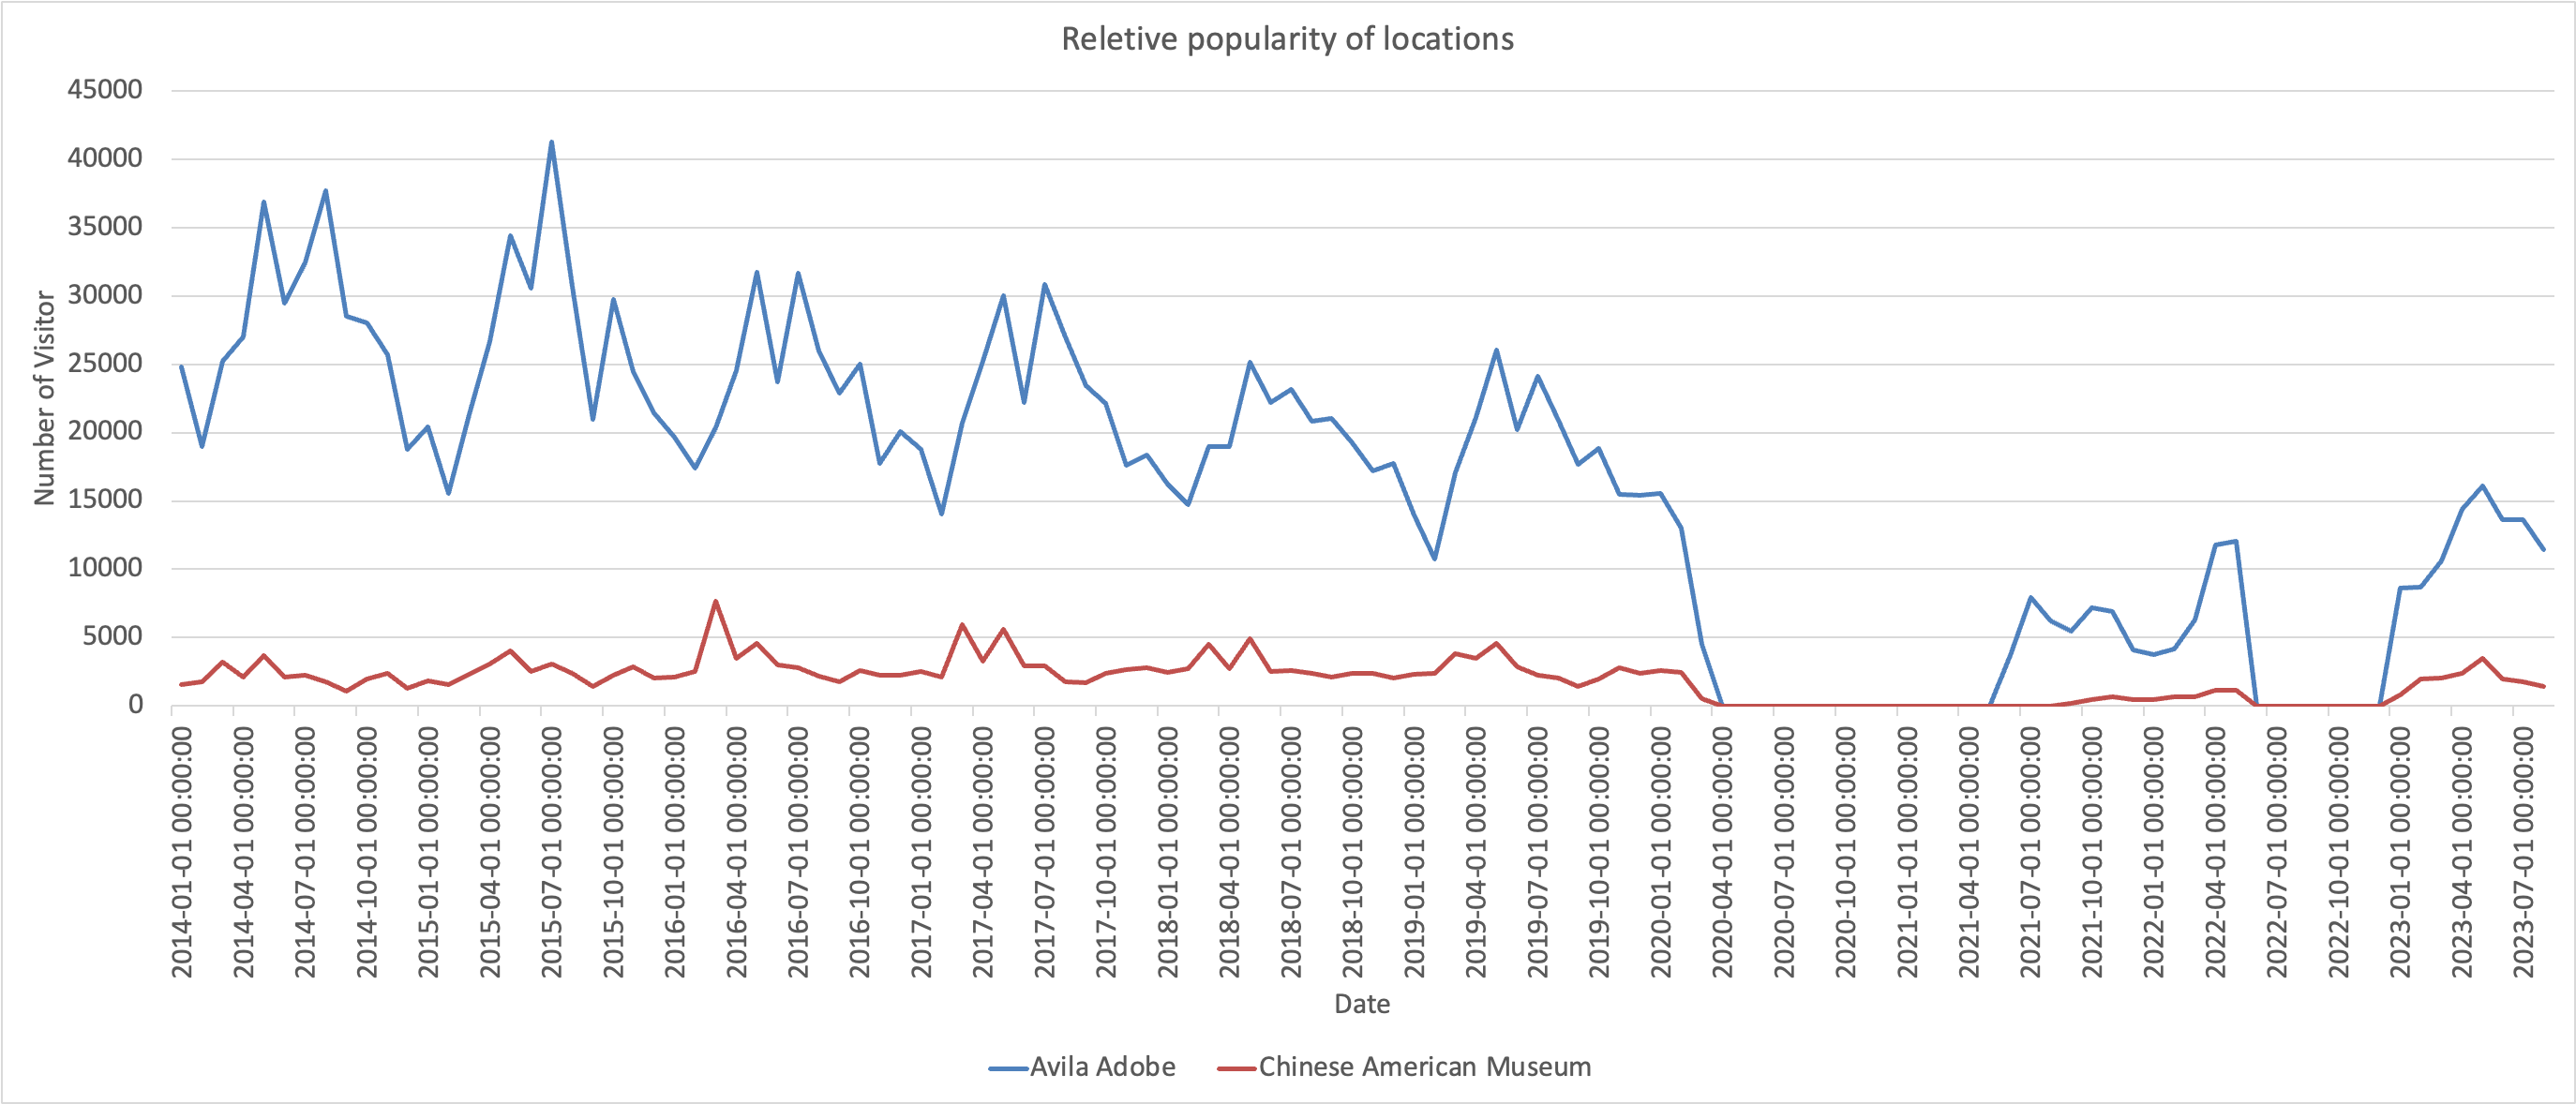

In [46]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
sns.set_style("whitegrid")

missing_value = 0 # YOUR CODE HERE
df.fillna(missing_value, inplace = True)

for column in df.columns[1 : ]:
    format = int # YOUR CODE HERE
    if df[column].dtype != format:
        df[column] = df[column].astype(int)

print(df.head())
print("\nData types after conversion:")
print(df.dtypes)

df.to_excel("../../Dataset/LA_cleaned.xlsx")

       Month  America Tropical Interpretive Center  Avila Adobe  \
0 2014-01-01                                  6602        24778   
1 2014-02-01                                  5029        18976   
2 2014-03-01                                  8129        25231   
3 2014-04-01                                  2824        26989   
4 2014-05-01                                 10694        36883   

   Chinese American Museum  Gateway to Nature Center  Firehouse Museum  \
0                     1581                         0              4486   
1                     1785                         0              4172   
2                     3229                         0              7082   
3                     2129                         0              6756   
4                     3676                         0             10858   

   Hellman Quon  IAMLA  Pico House   Visitor Center/ El Tranquilo Gallery  \
0             0      0         2204                                  2961  

# Bonus task 2 (bonus 10 points)

Use **Excel** to create piechart thay displays number of visitors over different locations throughout 2015 year.


Attach screenshot of the chart from Excel

The figure generated are shown as follows:

<img src="./Number_of_Visitors.png">

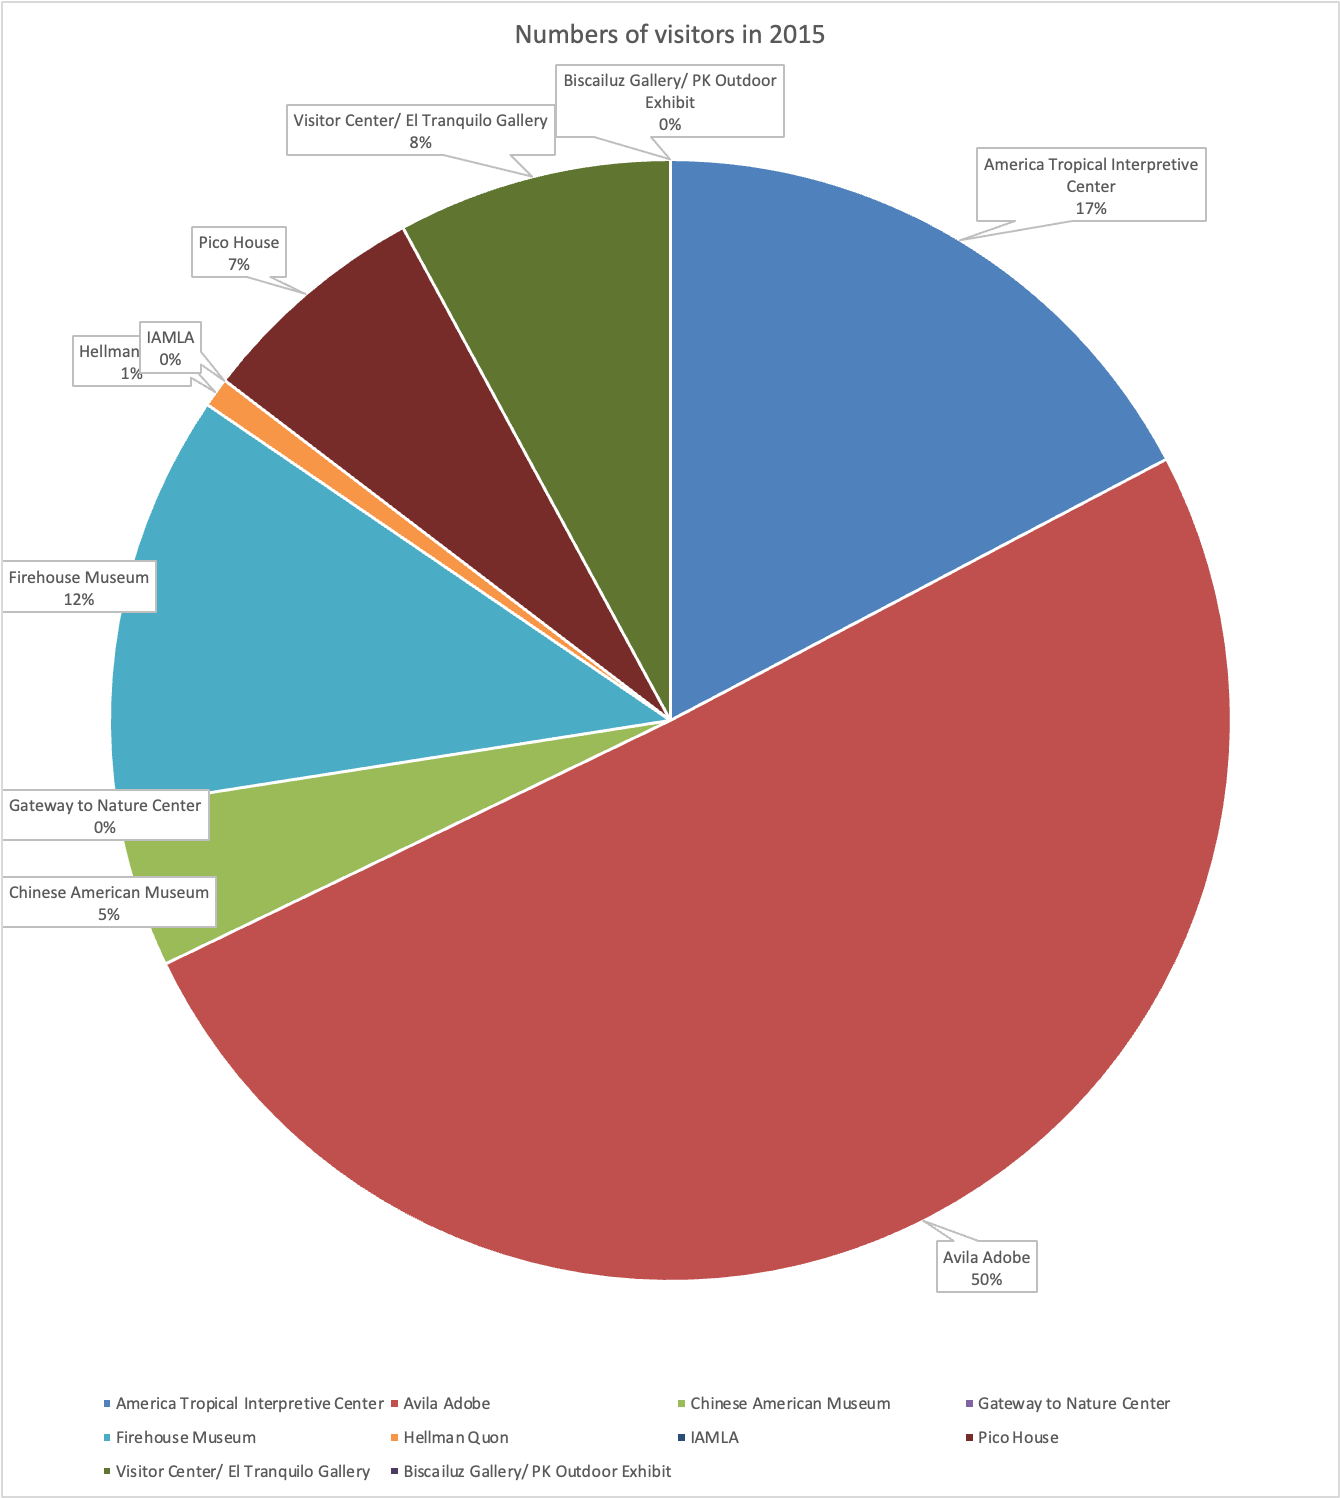